In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('bmw_dataset.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 49999 non-null  object 
 1   Year                  49998 non-null  float64
 2   Region                49998 non-null  object 
 3   Color                 49997 non-null  object 
 4   Fuel_Type             49999 non-null  object 
 5   Transmission          49996 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            49997 non-null  float64
 8   Price_USD             49996 non-null  float64
 9   Sales_Volume          49999 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [57]:
import klib

GridSpec(6, 6)

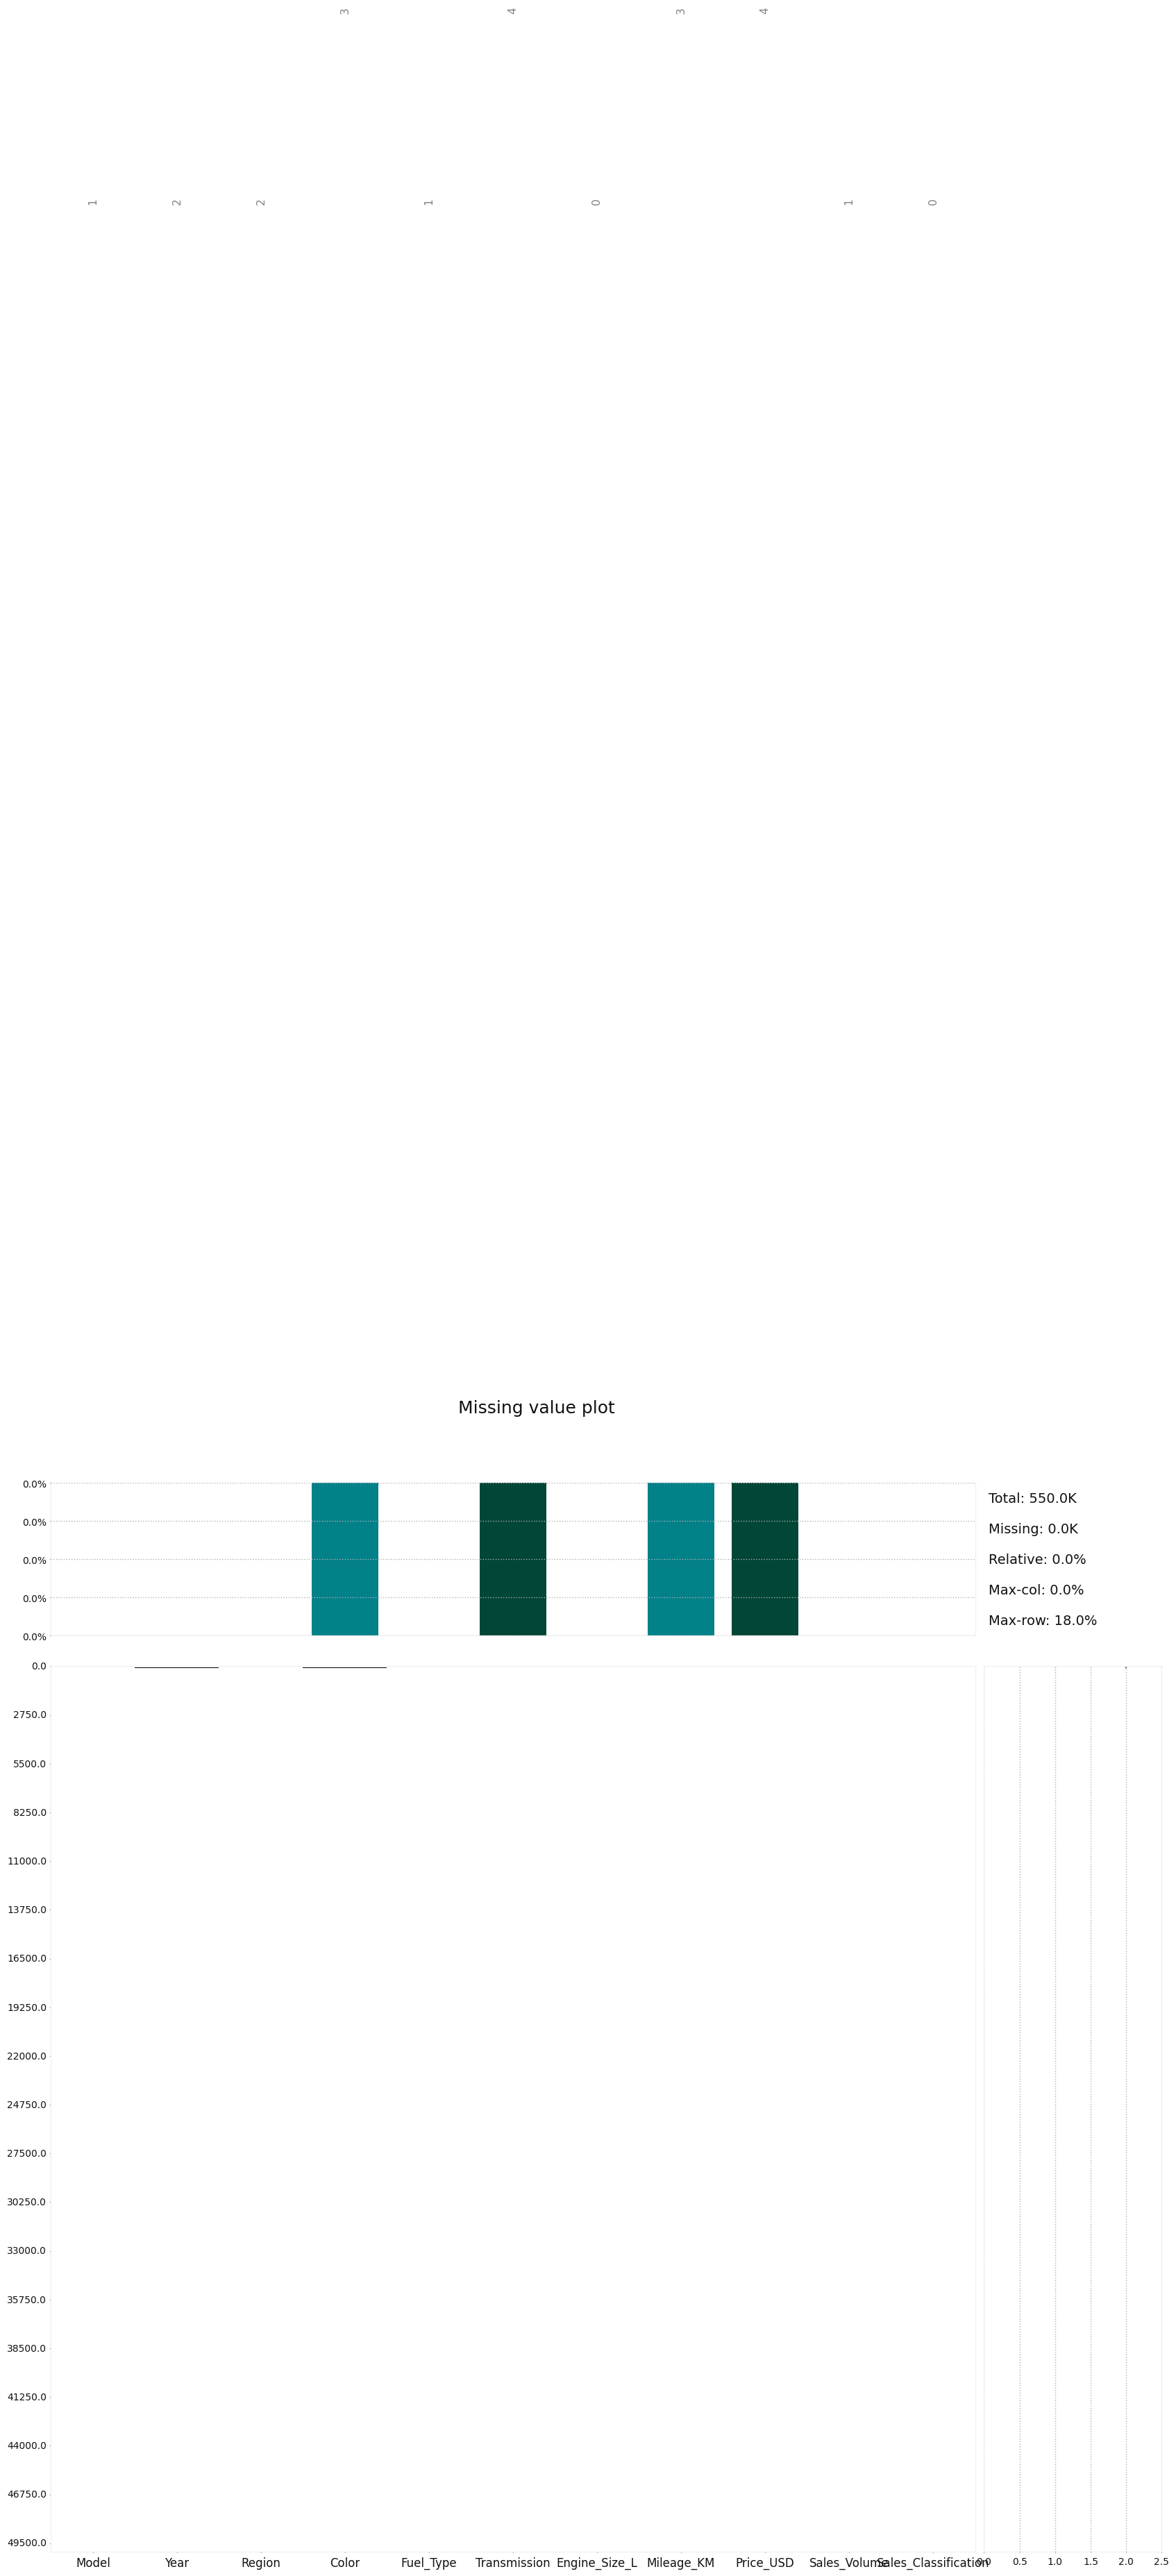

In [58]:
klib.missingval_plot(df)

In [59]:
klib.corr_interactive_plot(df)

In [60]:
klib.data_cleaning(df)

Shape of cleaned data: (50000, 11) - Remaining NAs: 21


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.96 MB (-70.48%)



,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification
0,5 Series,2016.0,Asia,Red,Petrol,Manual,3.5,151748.0,98740.0,8300.0,High
1,i8,2013.0,North America,Red,Hybrid,Automatic,1.6,121671.0,79219.0,3428.0,Low
2,5 Series,2022.0,North America,Blue,Petrol,Automatic,4.5,10991.0,113265.0,6994.0,Low
3,X3,2024.0,Middle East,Blue,Petrol,Automatic,1.7,27255.0,60971.0,4047.0,Low
4,7 Series,2020.0,South America,Black,Diesel,Manual,2.1,122131.0,49898.0,3080.0,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014.0,Asia,Red,Hybrid,Manual,4.6,151030.0,42932.0,8182.0,High
49996,i3,2023.0,Middle East,Silver,Electric,Manual,4.2,147396.0,48714.0,9816.0,High
49997,5 Series,2010.0,Middle East,Red,Petrol,Automatic,4.5,174939.0,46126.0,8280.0,High
49998,i3,2020.0,Asia,White,Electric,Automatic,3.8,3379.0,58566.0,9486.0,High


In [61]:
import matplotlib.pyplot as plt

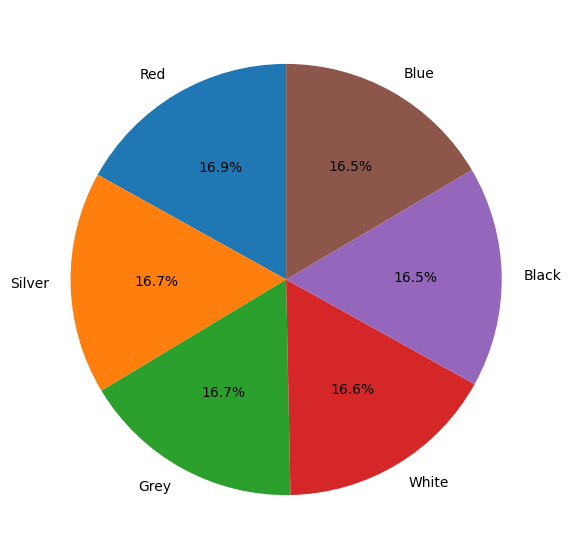

In [62]:
plt.figure(figsize=[7, 7])
color_counts = df['Color'].value_counts()
plt.pie(
    color_counts,
    labels=color_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.show()

In [63]:
from datacleaner import autoclean

In [64]:
df = autoclean(df)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\datacleaner\datacleaner.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\datacleaner\datacleaner.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  int64  
 1   Year                  50000 non-null  float64
 2   Region                50000 non-null  int64  
 3   Color                 50000 non-null  int64  
 4   Fuel_Type             50000 non-null  int64  
 5   Transmission          50000 non-null  int64  
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  float64
 8   Price_USD             50000 non-null  float64
 9   Sales_Volume          50000 non-null  float64
 10  Sales_Classification  50000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 4.2 MB


In [66]:
import plotly.express as px

In [67]:
fig = px.bar(df, x='Model', y='Sales_Volume')
fig.show()

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()
num_col = df.select_dtypes(include=['float64', 'int64']).columns.drop('Price_USD')
df[num_col] = scaler.fit_transform(df[num_col])

In [70]:
df.head(20)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,0.1,0.428571,0.2,0.6,1.000000,1.0,0.571429,0.758752,98740.0,0.828367,0.0
1,1.0,0.214286,0.8,0.6,0.666667,0.0,0.028571,0.608361,79219.0,0.336196,1.0
2,0.1,0.857143,0.8,0.2,1.000000,0.0,0.857143,0.054942,113265.0,0.696434,1.0
3,0.6,1.000000,0.6,0.2,1.000000,0.0,0.057143,0.136265,60971.0,0.398727,1.0
4,0.2,0.714286,1.0,0.0,0.000000,1.0,0.171429,0.610661,49898.0,0.301041,1.0
5,0.1,0.500000,0.6,0.8,0.000000,1.0,0.114286,0.856825,42926.0,0.114355,1.0
6,1.0,0.857143,0.4,1.0,0.000000,1.0,0.085714,0.983724,55064.0,0.792908,0.0
7,0.4,0.285714,0.2,0.0,0.000000,0.0,0.028571,0.605786,102778.0,0.053743,1.0
8,0.6,0.428571,1.0,1.0,0.000000,0.0,0.057143,0.240358,116482.0,0.893424,0.0
9,1.0,0.642857,0.4,0.6,0.333333,1.0,0.428571,0.178491,96257.0,0.435499,1.0


In [71]:
from sklearn.model_selection import train_test_split

x = df.drop('Price_USD', axis=1)
y = df['Price_USD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
y_pred = lr.predict(x_test)

In [77]:
lr_score = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

In [78]:
lr_score

-0.000757332387469889

In [79]:
lr_mae

22570.18682158382

In [80]:
dt = DecisionTreeRegressor(random_state=42)

In [81]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [82]:
y_pred = dt.predict(x_test)

In [83]:
dt_score = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)

In [84]:
dt_score

-1.0277573316276243

In [85]:
dt_mae

30266.22375

In [86]:
rf = RandomForestRegressor(random_state=42)

In [87]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_pred = rf.predict(x_test)

In [89]:
rf_score = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

In [90]:
rf_score

-0.024691647693544372

In [91]:
rf_mae

22720.067890000002

In [92]:
cvm = SVR(kernel='linear', C=50.0)

In [93]:
cvm.fit(x_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,50.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [94]:
y_pred = cvm.predict(x_test)

In [95]:
cvm_score = r2_score(y_test, y_pred)
cvm_mae = mean_absolute_error(y_test, y_pred)

In [96]:
cvm_score

-0.0012543334464685252

In [97]:
cvm_mae

22572.73622654981

In [98]:
knn = KNeighborsRegressor(n_neighbors=5)

In [99]:
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [100]:
y_pred = knn.predict(x_test)

In [101]:
knn_score = r2_score(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)

In [102]:
knn_score

-0.1936674238281464

In [103]:
knn_mae

24015.580110000003

In [104]:
from tabulate import tabulate

In [105]:
result = [
    ['Linear Regression', lr_score, lr_mae],
    ['Decision Tree', dt_score, dt_mae],
    ['Random Forest', rf_score, rf_mae],
    ['CVM', cvm_score, cvm_mae],
    ['KNN', knn_score, knn_mae],
]

headers = ['Algorithm', 'r2_score', 'mean_absolute_error']

table = tabulate(result, headers=headers, tablefmt='grid', floatfmt='.2f')

In [106]:
print(table)

+-------------------+------------+-----------------------+
| Algorithm         |   r2_score |   mean_absolute_error |
+===================+============+=======================+
| Linear Regression |      -0.00 |              22570.19 |
+-------------------+------------+-----------------------+
| Decision Tree     |      -1.03 |              30266.22 |
+-------------------+------------+-----------------------+
| Random Forest     |      -0.02 |              22720.07 |
+-------------------+------------+-----------------------+
| CVM               |      -0.00 |              22572.74 |
+-------------------+------------+-----------------------+
| KNN               |      -0.19 |              24015.58 |
+-------------------+------------+-----------------------+
